In [2]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

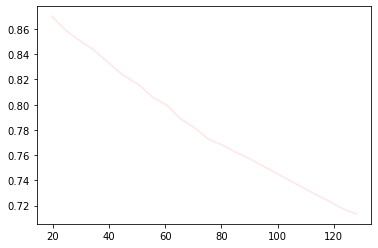

In [13]:
#Données


t = np.array([19.7, 24.6, 29.5, 34.4, 44.3, 50.8, 55.7, 60.7, 65.6, 70.5, 75.4, 80.3, 85.2, 90.2, 95.1, 113.1, 118.0, 123.0, 127.9])
dt = 0.1

h = np.array([243, 262, 276, 288, 320, 335, 351, 361, 378, 389, 403, 410, 419, 427, 436, 468, 476, 485, 491])*-10**-3
dh = 5*10**-3

R =  4.65*10**-2            #Rayon du cylindre (m)
dR = 2*10**-3

h0 = 25.8*10**-2            #Altitude initiale de l'eau (m)
dh0 = 3*10**-3

r =  4*10**-3               #Rayon orifice (m)
dr = 2*10**-4

g = 9.81

plt.plot(t, np.sqrt(h+1),'r', alpha=0.1)


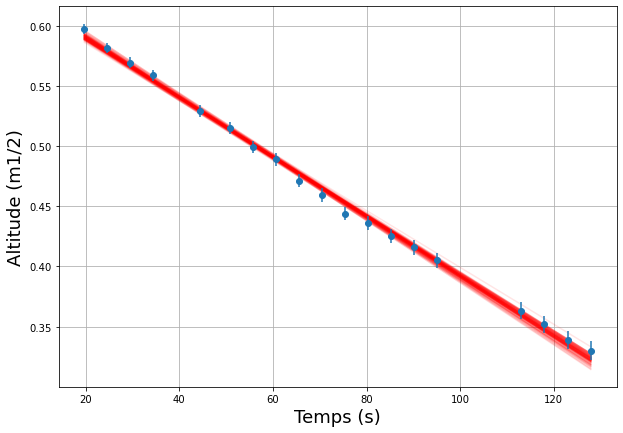

7.592861529079493e-06 +- 1.3124467535905663e-07


In [17]:
#Monte Carlo 

S = np.pi*R**2

def sqrt_h(x,s,a):
    return a -(s/S)*np.sqrt(g/2)*x

N_mc = 100 # nombre de simulations
param = np.zeros((2, N_mc))


for i in range(N_mc):
    
    h_mc = np.array([])
    t_mc = np.array([])
    
    for k in range (len(t)) :
        h_mc = np.append(h_mc, npr.normal(loc=(h[k]), scale=dh))
        t_mc = np.append(t_mc, npr.normal(loc=t[k], scale=dt))
            
    pop, covop = curve_fit(sqrt_h, t_mc, np.sqrt(h_mc+0.6))
    param[0,i] = pop[0]
    param[1,i] = pop[1]
    
y_th = sqrt_h(t, *pop)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th = sqrt_h(t, *param[:,i])
    plt.plot(t, y_th,'r', alpha=0.1)
plt.errorbar(t, np.sqrt(h+0.6), xerr=dt, yerr=dh/(2*np.sqrt(h+0.6)), fmt='o')
plt.grid(which='both')
plt.xlabel('Temps (s)', fontsize=18)
plt.ylabel('Altitude (m1/2)', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy = np.mean(param[0,:])
a_sig = np.std(param[0,:])

print (a_moy, '+-',a_sig )
